# Part 4: CLASSIFICATION

1. This is an example code to generate classification data of two classes

2. Based on the code above, generate data similar to:

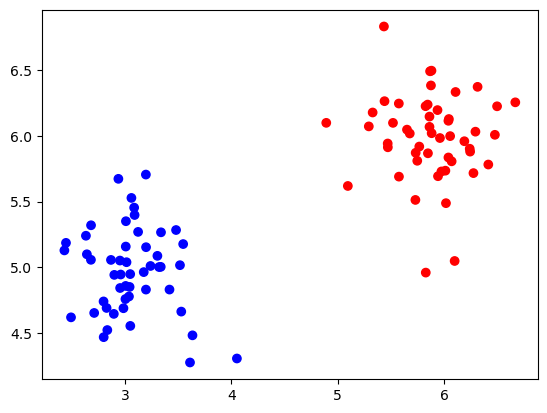

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#data number = 50
N1 = 50
N2 = 50
K = 2
sigma = 0.1

mean = (6,6)
cov = [[sigma, 0], [0, sigma]]
X1 = np.random.multivariate_normal(mean, cov, N1)
c1 = ['red'] * len(X1)

mean = (3,5)
cov = [[sigma, 0], [0, sigma]]
X2 = np.random.multivariate_normal(mean, cov, N2)
c2 = ['blue'] * len(X2)

X = np.concatenate((X1, X2))
color = np.concatenate((c1, c2))

T = []
for n in range(0, len(X)):
    if(n<len(X1)):
        T.append(0)
    if(n>=len(X1) and n<len(X1)+len(X2)):
        T.append(1)


plt.scatter(X[:, 0], X[:, 1], marker='o', c=color)
plt.show()

3. Implement the MAP for classification, so that using the above data as training, we can generate a classifier in the basis function space (a space with higher dimensionality). Show the first and second bases similar to:

In [2]:
class MAP_classification():
    def __init__(self, M,  s, alpha, Mu1=None, Mu2=None, Mu=None):
        self.w = np.zeros([M,1])
        self.M = M
        self.s = s
        self.Mu1 = Mu1
        self.Mu2 = Mu2
        self.alpha = alpha
        self.Mu = Mu

        self.SS0_1 = (1/alpha) * np.identity(M)
        self.m0 = np.zeros((M, 1))
        self.H = None
        self.Phi = None
        self.S_N = None

    def gaussian_basis(self, X):
        Phi = np.ones((len(X), self.M))
        for n in range(len(X)):
            for m in range(1, self.M):
                Phi[n][m] = np.exp(-( (X[n][0]-self.Mu1[m]) ** 2 + (X[n][1]-self.Mu2[m]) ** 2 ) / (2 * self.s**2))
        return Phi

    def train(self, X, t):
        Phi = self.gaussian_basis(X)
        times = 0
        while True:
            times += 1 
            bias = self.compute_bias(Phi, t)
            if abs(np.linalg.norm(bias, 'fro')) < 1e-9:
                break
            self.w = self.w - bias
        return Phi, self.w, times 

    def predict(self, X):
        self.S_N = np.linalg.inv(self.H)
        Phi = self.gaussian_basis(X)
        theta_square = Phi @ self.S_N @ Phi.T
        mu_a = self.w.T @ Phi.T
        Probability = np.zeros(len(X))
        for i in range(len(X)):
            Probability[i]=1 / (1+ np.exp( - (1+ np.pi * theta_square[i][i]/8)**(-0.5) * mu_a[0][i])  )

        return Probability

    def compute_bias(self, Phi, t):
        theta = 1.0 / (1 + np.exp(- (Phi @ self.w) ))
        DeltaE = self.SS0_1 @ (self.w - self.m0) + Phi.T @ (theta - t)
        R = np.eye(Phi.shape[0])
        print(R.shape)
        for i in range(Phi.shape[0]):
            R[i][i] = theta[i] * (1 - theta[i])
        self.H = self.SS0_1 + Phi.T @ R @ Phi
        bias = np.linalg.inv(self.H) @ DeltaE
        return bias


(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
Training times: 7
w: [[ 0.58999996]
 [ 3.26062807]
 [ 3.14629322]
 [ 1.26963133]
 [-1.43965497]
 [-3.20786309]
 [-3.21143261]
 [-2.12146791]]
(100, 8)


/var/folders/ms/rhcl9x192jbfxzsm5y84586c0000gn/T/ipykernel_2405/4273450204.py:52: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  R[i][i] = theta[i] * (1 - theta[i])


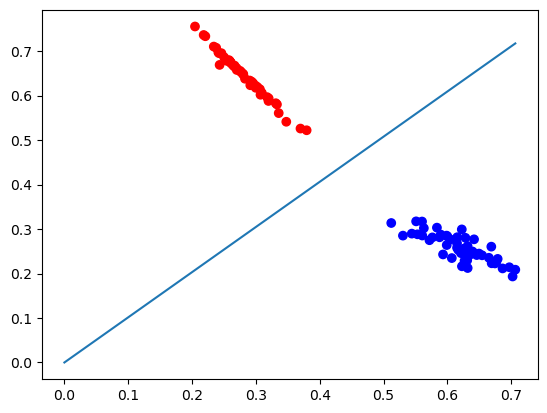

In [3]:
M = 8
Mu1 = 10* np.linspace(0, 1, M) 
Mu2 = 10* np.linspace(0, 1, M)
Mu = 20 * np.linspace(0, 1, M)
sigma = 4
alpha = 3


model = MAP_classification(M=M, Mu1=Mu1, Mu2=Mu2, s = sigma, alpha=3)
T = np.array(T).reshape(-1,1)
Phi, w, times = model.train(X, T)

print("Training times:", times)
print("w:", w)

print(Phi.shape)
points = np.zeros((len(X),2))
a = 1
b = 6
for i in range(len(X)):
    points[i][0] = Phi[i][a]
    points[i][1] = Phi[i][b]

x_max = max(points[:,0])
k = - w[a]/w[b]
x = np.linspace(0,x_max,100)
y = k * x
plt.plot(x, y)
plt.scatter(points[:,0],points[:,1],marker = 'o', c=color)

Changing the values of M, sigma and alpha could get different results.

4. In the testing stage, use any other locations in the original space (in the original space with low dimensionality, in the range of 0 to 10) as the test data, and plot the predicted labels (whose values between 0 to 1) in colors similar to:

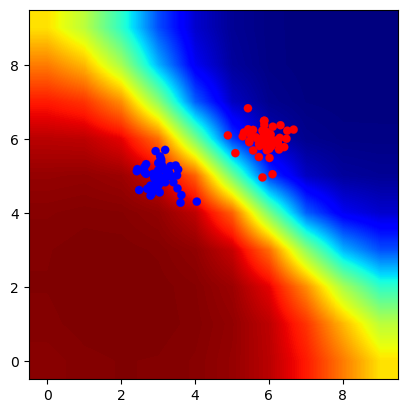

In [4]:
X_test = []
for i in range(10):
    for j in range(10):
        X_test.append([i,j])

probability = model.predict(X_test).reshape(10,10)
plt.imshow(probability, interpolation='bilinear', origin='lower', cmap=plt.cm.jet)
plt.scatter(X[:,0],X[:,1],marker='o',c=color,linewidths=0.1)
plt.show()